In [2]:
# Code to write changes in database. This is done to derive the dataset

In [5]:
'''from sqlalchemy import create_engine, Column, Integer, Boolean, DECIMAL
from sqlalchemy.orm import declarative_base, sessionmaker

# Database connection parameters
username = 'root'
password = 'iamukr77'
host = 'localhost'
port = '3306'  # Default MySQL port
database = 'uk'  # Your schema name

# Create an engine instance with provided credentials
DATABASE_URL = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'

# Create the database engine
engine = create_engine(DATABASE_URL, echo=True)

# Define the base class for models
Base = declarative_base()

# Define the DynamicPrices model
class DynamicPrices(Base):
    __tablename__ = 'Dynamic_Pricing_Data'
    id = Column(Integer, primary_key=True, autoincrement=True)
    room_type = Column(Boolean, nullable=False)
    is_weekend = Column(Boolean, nullable=False)
    is_summer = Column(Boolean, nullable=False)
    is_booked = Column(Boolean, nullable=False)
    loyalty = Column(Boolean, nullable=False)
    is_special_offer = Column(Boolean, nullable=False)
    base_price = Column(DECIMAL(10, 2), default=5000.00)
    final_price = Column(DECIMAL(10, 2))

# Create the table in the database
Base.metadata.create_all(engine)

# Create a new session
Session = sessionmaker(bind=engine)
session = Session()

# Define the values to insert
values_to_insert = [
    (0, 0, 0, 0, 0, 0, 5000, 5500),
    (0, 0, 0, 0, 0, 1, 5000, 5115),
    (0, 0, 0, 0, 1, 0, 5000, 4400),
    (0, 0, 0, 0, 1, 1, 5000, 4092),
    (0, 0, 0, 1, 0, 0, 5000, 6490),
    (0, 0, 0, 1, 0, 1, 5000, 6036),
    (0, 0, 0, 1, 1, 0, 5000, 5192),
    (0, 0, 0, 1, 1, 1, 5000, 4829),
    (0, 0, 1, 0, 0, 0, 5000, 6325),
    (0, 0, 1, 0, 0, 1, 5000, 5882),
    (0, 0, 1, 0, 1, 0, 5000, 5060),
    (0, 0, 1, 0, 1, 1, 5000, 4706),
    (0, 0, 1, 1, 0, 0, 5000, 7463),
    (0, 0, 1, 1, 0, 1, 5000, 6941),
    (0, 0, 1, 1, 1, 0, 5000, 5971),
    (0, 0, 1, 1, 1, 1, 5000, 5553),
    (0, 1, 0, 0, 0, 0, 5000, 5775),
    (0, 1, 0, 0, 0, 1, 5000, 5371),
    (0, 1, 0, 0, 1, 0, 5000, 4620),
    (0, 1, 0, 0, 1, 1, 5000, 4297),
    (0, 1, 0, 1, 0, 0, 5000, 6814),
    (0, 1, 0, 1, 0, 1, 5000, 6337),
    (0, 1, 0, 1, 1, 0, 5000, 5452),
    (0, 1, 0, 1, 1, 1, 5000, 5070),
    (0, 1, 1, 0, 0, 0, 5000, 6641),
    (0, 1, 1, 0, 0, 1, 5000, 6176),
    (0, 1, 1, 0, 1, 0, 5000, 5313),
    (0, 1, 1, 0, 1, 1, 5000, 4941),
    (0, 1, 1, 1, 0, 0, 5000, 7837),
    (0, 1, 1, 1, 0, 1, 5000, 7288),
    (0, 1, 1, 1, 1, 0, 5000, 6269),
    (0, 1, 1, 1, 1, 1, 5000, 5830),
    (1, 0, 0, 0, 0, 0, 5000, 6000),
    (1, 0, 0, 0, 0, 1, 5000, 5580),
    (1, 0, 0, 0, 1, 0, 5000, 4800),
    (1, 0, 0, 0, 1, 1, 5000, 4464),
    (1, 0, 0, 1, 0, 0, 5000, 7080),
    (1, 0, 0, 1, 0, 1, 5000, 6584),
    (1, 0, 0, 1, 1, 0, 5000, 5664),
    (1, 0, 0, 1, 1, 1, 5000, 5268),
    (1, 0, 1, 0, 0, 0, 5000, 6900),
    (1, 0, 1, 0, 0, 1, 5000, 6417),
    (1, 0, 1, 0, 1, 0, 5000, 5520),
    (1, 0, 1, 0, 1, 1, 5000, 5134),
    (1, 0, 1, 1, 0, 0, 5000, 8142),
    (1, 0, 1, 1, 0, 1, 5000, 7572),
    (1, 0, 1, 1, 1, 0, 5000, 6514),
    (1, 0, 1, 1, 1, 1, 5000, 6058),
    (1, 1, 0, 0, 0, 0, 5000, 6300),
    (1, 1, 0, 0, 0, 1, 5000, 5859),
    (1, 1, 0, 0, 1, 0, 5000, 5040),
    (1, 1, 0, 0, 1, 1, 5000, 4687),
    (1, 1, 0, 1, 0, 0, 5000, 7434),
    (1, 1, 0, 1, 0, 1, 5000, 6914),
    (1, 1, 0, 1, 1, 0, 5000, 5947),
    (1, 1, 0, 1, 1, 1, 5000, 5531),
    (1, 1, 1, 0, 0, 0, 5000, 7245),
    (1, 1, 1, 0, 0, 1, 5000, 6738),
    (1, 1, 1, 0, 1, 0, 5000, 5796),
    (1, 1, 1, 0, 1, 1, 5000, 5390),
    (1, 1, 1, 1, 0, 0, 5000, 8549),
    (1, 1, 1, 1, 0, 1, 5000, 7951),
    (1, 1, 1, 1, 1, 0, 5000, 6839),
    (1, 1, 1, 1, 1, 1, 5000, 6364)
]

# Insert the values into the database
for value in values_to_insert:
    new_entry = DynamicPrices(
        room_type=value[0],
        is_weekend=value[1],
        is_summer=value[2],
        is_booked=value[3],
        loyalty=value[4],
        is_special_offer=value[5],
        base_price=value[6],
        final_price=value[7]
    )
    session.add(new_entry)

# Commit the transaction
session.commit()

# Query and print the table content
results = session.query(DynamicPrices).all()
for row in results:
    print(row.id, row.room_type, row.is_weekend, row.is_summer, row.is_booked, row.loyalty, row.is_special_offer, row.base_price, row.final_price)

# Close the session
session.close()
'''

2024-07-21 15:31:52,769 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-07-21 15:31:52,770 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-07-21 15:31:52,773 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-07-21 15:31:52,774 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-07-21 15:31:52,777 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-07-21 15:31:52,778 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-07-21 15:31:52,781 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-21 15:31:52,783 INFO sqlalchemy.engine.Engine DESCRIBE `uk`.`Dynamic_Pricing_Data`
2024-07-21 15:31:52,784 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-07-21 15:31:52,794 INFO sqlalchemy.engine.Engine COMMIT
2024-07-21 15:31:52,805 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-21 15:31:52,812 INFO sqlalchemy.engine.Engine INSERT INTO `Dynamic_Pricing_Data` (room_type, is_weekend, is_summer, is_booked, loyalty, is_special_offer, base_price, final_price) VALUES (%(room_type)s

In [3]:
# Dataset successfully created and saved as 'dynamic_pricing_data.csv'

In [6]:
import pandas as pd

# Load the data
data = pd.read_csv('dynamic_pricing_data.csv')

# Display the first few rows of the dataframe
print(data.head())


   id  room_type  is_weekend  is_summer  is_booked  loyalty  is_special_offer  \
0   1          0           0          0          0        0                 0   
1   2          0           0          0          0        0                 1   
2   3          0           0          0          0        1                 0   
3   4          0           0          0          0        1                 1   
4   5          0           0          0          1        0                 0   

   base_price  final_price  
0      5000.0       5500.0  
1      5000.0       5115.0  
2      5000.0       4400.0  
3      5000.0       4092.0  
4      5000.0       6490.0  


In [7]:
# Check for any missing values
print(data.isnull().sum())

# Convert Boolean columns to integers (if necessary)
boolean_columns = ['room_type', 'is_weekend', 'is_summer', 'is_booked', 'loyalty', 'is_special_offer']
data[boolean_columns] = data[boolean_columns].astype(int)

id                  0
room_type           0
is_weekend          0
is_summer           0
is_booked           0
loyalty             0
is_special_offer    0
base_price          0
final_price         0
dtype: int64


In [4]:
# Training a RandomForestRegressor model on 'dynamic_pricing_data.csv'

In [1]:
# !pip install pandas scikit-learn joblib

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Load the CSV data
data = pd.read_csv('dynamic_pricing_data.csv')

# Display the first few rows to understand the data
data.head()

,id,room_type,is_weekend,is_summer,is_booked,loyalty,is_special_offer,base_price,final_price
0,1,0,0,0,0,0,0,5000.0,5500.0
1,2,0,0,0,0,0,1,5000.0,5115.0
2,3,0,0,0,0,1,0,5000.0,4400.0
3,4,0,0,0,0,1,1,5000.0,4092.0
4,5,0,0,0,1,0,0,5000.0,6490.0


In [4]:
# Exclude the 'id' column
X = data[['room_type', 'is_weekend', 'is_summer', 'is_booked', 'loyalty', 'is_special_offer', 'base_price']]
y = data['final_price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standard scaling and a RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model to a file
joblib.dump(pipeline, 'dynamic_pricing_model.joblib')

print("Model training complete and saved to 'dynamic_pricing_model.joblib'")


Model training complete and saved to 'dynamic_pricing_model.joblib'


In [5]:
def predict_price(room_type, is_weekend, is_summer, is_booked, loyalty, is_special_offer, base_price):
    # Load the saved model
    model = joblib.load('dynamic_pricing_model.joblib')
    
    # Create a DataFrame with the user input
    input_data = pd.DataFrame({
        'room_type': [room_type],
        'is_weekend': [is_weekend],
        'is_summer': [is_summer],
        'is_booked': [is_booked],
        'loyalty': [loyalty],
        'is_special_offer': [is_special_offer],
        'base_price': [base_price]
    })
    
    # Predict the final price
    predicted_price = model.predict(input_data)
    return predicted_price[0]

In [6]:
def get_user_input():
    # Get user input for each feature
    room_type = int(input("Enter room type (0 for Normal, 1 for Deluxe): "))
    is_weekend = int(input("Is it a weekend? (0 for No, 1 for Yes): "))
    is_summer = int(input("Is it summer? (0 for No, 1 for Yes): "))
    is_booked = int(input("Is the room booked? (0 for No, 1 for Yes): "))
    loyalty = int(input("Is there a loyalty discount? (0 for No, 1 for Yes): "))
    is_special_offer = int(input("Is there a special offer? (0 for No, 1 for Yes): "))
    base_price = float(input("Enter the base price: "))
    
    return room_type, is_weekend, is_summer, is_booked, loyalty, is_special_offer, base_price

# Get user input
user_input = get_user_input()

# Predict the price
predicted_price = predict_price(*user_input)

# Print the predicted price
print(f"The predicted final price is: {predicted_price:.2f}")

Enter room type (0 for Normal, 1 for Deluxe):  1
Is it a weekend? (0 for No, 1 for Yes):  1
Is it summer? (0 for No, 1 for Yes):  1
Is the room booked? (0 for No, 1 for Yes):  1
Is there a loyalty discount? (0 for No, 1 for Yes):  1
Is there a special offer? (0 for No, 1 for Yes):  1
Enter the base price:  5000


The predicted final price is: 6332.49


Model training complete and saved to 'dynamic_pricing_model.joblib'


Enter room type (0 for Normal, 1 for Deluxe):  0
Is it a weekend? (0 for No, 1 for Yes):  0
Is it summer? (0 for No, 1 for Yes):  0
Is the room booked? (0 for No, 1 for Yes):  1
Is there a loyalty discount? (0 for No, 1 for Yes):  0
Is there a special offer? (0 for No, 1 for Yes):  0


The predicted price is: 6630.77
The actual price in dataset was: 6490.00


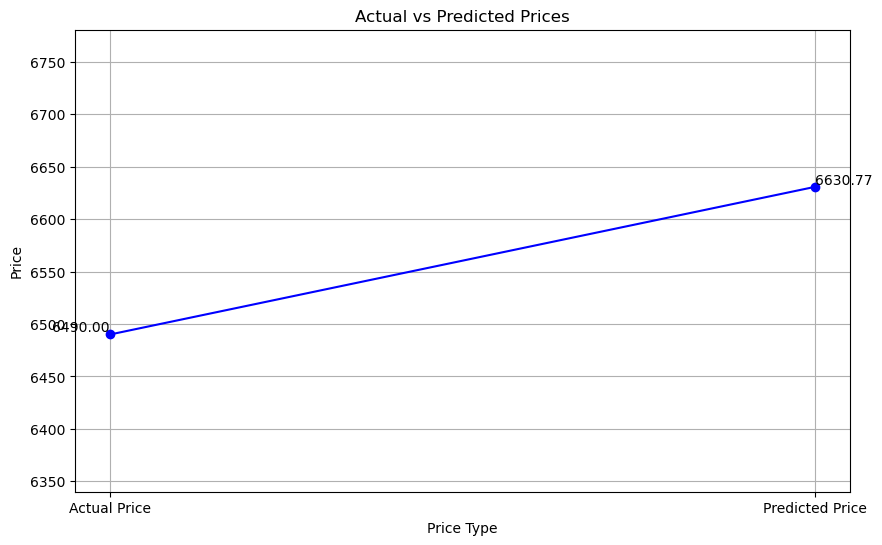

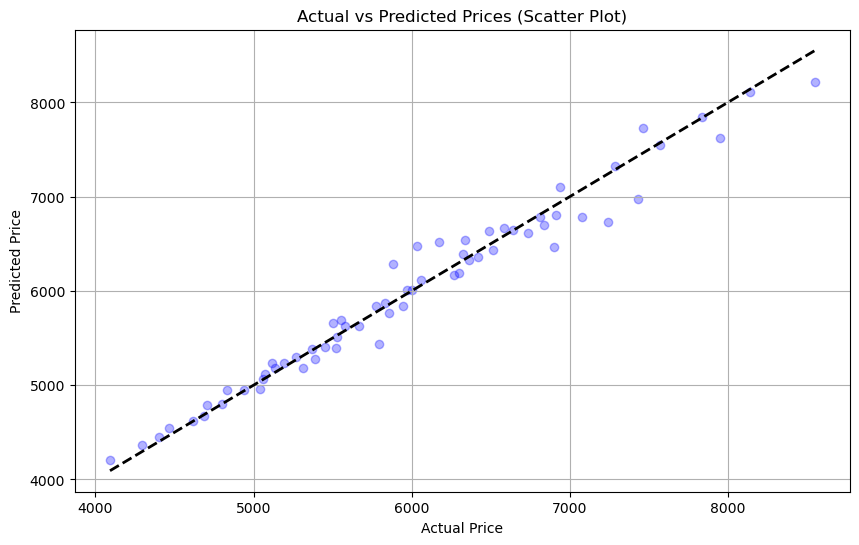

In [34]:
# Complete Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('dynamic_pricing_data.csv')

# Exclude the 'id' column
X = data[['room_type', 'is_weekend', 'is_summer', 'is_booked', 'loyalty', 'is_special_offer', 'base_price']]
y = data['final_price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standard scaling and a RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model to a file
joblib.dump(pipeline, 'dynamic_pricing_model.joblib')

print("Model training complete and saved to 'dynamic_pricing_model.joblib'")

def predict_price(room_type, is_weekend, is_summer, is_booked, loyalty, is_special_offer, base_price=5000):
    # Load the saved model
    model = joblib.load('dynamic_pricing_model.joblib')
    
    # Create a DataFrame with the user input
    input_data = pd.DataFrame({
        'room_type': [room_type],
        'is_weekend': [is_weekend],
        'is_summer': [is_summer],
        'is_booked': [is_booked],
        'loyalty': [loyalty],
        'is_special_offer': [is_special_offer],
        'base_price': [base_price]
    })
    
    # Predict the final price
    predicted_price = model.predict(input_data)
    return predicted_price[0], input_data

def get_user_input():
    # Get user input for each feature except for base price
    room_type = int(input("Enter room type (0 for Normal, 1 for Deluxe): "))
    is_weekend = int(input("Is it a weekend? (0 for No, 1 for Yes): "))
    is_summer = int(input("Is it summer? (0 for No, 1 for Yes): "))
    is_booked = int(input("Is the room booked? (0 for No, 1 for Yes): "))
    loyalty = int(input("Is there a loyalty discount? (0 for No, 1 for Yes): "))
    is_special_offer = int(input("Is there a special offer? (0 for No, 1 for Yes): "))
    
    return room_type, is_weekend, is_summer, is_booked, loyalty, is_special_offer

def plot_scatter_actual_vs_predicted():
    # Scatter plot of actual vs. predicted prices
    X_test = data[['room_type', 'is_weekend', 'is_summer', 'is_booked', 'loyalty', 'is_special_offer', 'base_price']]
    y_test = data['final_price']
    y_pred = pipeline.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices (Scatter Plot)')
    plt.grid(True)
    plt.show()

def plot_actual_vs_predicted_price(actual_price, predicted_price):
    plt.figure(figsize=(10, 6))
    x_values = ['Actual Price', 'Predicted Price']
    y_values = [actual_price, predicted_price]
    
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.text('Predicted Price', predicted_price, f'{predicted_price:.2f}', horizontalalignment='left', verticalalignment='bottom')
    plt.text('Actual Price', actual_price, f'{actual_price:.2f}', horizontalalignment='right', verticalalignment='bottom')
    
    plt.xlabel('Price Type')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    min_y = min(actual_price, predicted_price) - 150 
    max_y = max(actual_price, predicted_price) + 150  
    plt.ylim(min_y, max_y)
    
    plt.grid(True)
    plt.show()

# Get user input
user_input = get_user_input()

# Predict the price with default base price
predicted_price, input_data = predict_price(*user_input)

# Print the predicted price
print(f"The predicted price is: {predicted_price:.2f}")

# input_data contains the same structure as our CSV
actual_price = data[(data['room_type'] == input_data['room_type'].values[0]) &
                    (data['is_weekend'] == input_data['is_weekend'].values[0]) &
                    (data['is_summer'] == input_data['is_summer'].values[0]) &
                    (data['is_booked'] == input_data['is_booked'].values[0]) &
                    (data['loyalty'] == input_data['loyalty'].values[0]) &
                    (data['is_special_offer'] == input_data['is_special_offer'].values[0]) &
                    (data['base_price'] == input_data['base_price'].values[0])]['final_price'].values

if len(actual_price) > 0:
    actual_price = actual_price[0]
    print(f"The actual price in dataset was: {actual_price:.2f}")
    plot_actual_vs_predicted_price(actual_price, predicted_price)
    plot_scatter_actual_vs_predicted()
else:
    print("No matching records found in the dataset.")